In [384]:
import pandas as pd
import glob
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Load Datasets

In [385]:
def combine_csv_files(folder_path):
    all_files = glob.glob(os.path.join(folder_path, '*.csv'))
    df_list = [pd.read_csv(file) for file in all_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

sd_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-datasets/sd'
la_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-datasets/la'

sd_weather_19_23 = combine_csv_files(sd_path)
la_weather_19_23 = combine_csv_files(la_path)

sd_output_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/san_diego_weather_combined.csv'
la_output_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_weather_combined.csv'

os.makedirs(os.path.dirname(sd_output_path), exist_ok=True)

sd_weather_19_23.to_csv(sd_output_path, index=False)
la_weather_19_23.to_csv(la_output_path, index=False)

In [386]:
def load_traffic_data(file_path):
    return pd.read_csv(file_path)

def load_weather_data(file_path):
    return pd.read_csv(file_path)

sd_traffic_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/TIMS_SD_Crashes2013-2024.csv'
la_traffic_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/LA2013-20149crashes.csv'
sd_weather_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/san_diego_weather_combined.csv'
la_weather_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_weather_combined.csv'

sd_traffic = load_traffic_data(sd_traffic_path)
la_traffic = load_traffic_data(la_traffic_path)
sd_weather = load_weather_data(sd_weather_path)
la_weather = load_weather_data(la_weather_path)

In [387]:
sd_traffic.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.093777,32.694394
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,0,0,-,-,32.85306,-116.86512,SAN DIEGO,UNINCORPORATED,-116.864564,32.853113
2,5639726,2013,2015-01-14,3711,2013-02-06,1940,3792,3711,3,5,...,0,1,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.079670,32.735391
3,5639817,2013,2015-01-15,3711,2013-02-18,1937,4243,NaN,1,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.122654,32.917255
4,5639818,2013,2013-03-14,3711,2013-02-01,1143,3661,SANDI,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.159290,32.990074


In [388]:
sd_traffic.dtypes

CASE_ID             int64
ACCIDENT_YEAR       int64
PROC_DATE          object
JURIS               int64
COLLISION_DATE     object
                   ...   
LONGITUDE         float64
COUNTY             object
CITY               object
POINT_X           float64
POINT_Y           float64
Length: 80, dtype: object

In [389]:
sd_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"San Diego, CA, United States",2022-01-01,63.6,53.0,59.1,63.6,53.0,59.1,45.9,62.0,...,10.5,5,NaN,2022-01-01T06:51:07,2022-01-01T16:53:46,0.97,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
1,"San Diego, CA, United States",2022-01-02,66.5,47.6,55.2,66.5,47.6,55.2,38.9,56.8,...,11.4,5,NaN,2022-01-02T06:51:19,2022-01-02T16:54:31,0.00,Clear,Clear conditions throughout the day.,clear-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
2,"San Diego, CA, United States",2022-01-03,60.2,39.5,50.2,60.2,39.5,50.1,39.7,68.6,...,11.5,5,NaN,2022-01-03T06:51:28,2022-01-03T16:55:17,0.03,Clear,Clear conditions throughout the day.,clear-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
3,"San Diego, CA, United States",2022-01-04,59.3,40.4,50.5,59.3,40.4,50.4,43.5,77.6,...,11.0,5,NaN,2022-01-04T06:51:36,2022-01-04T16:56:04,0.07,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
4,"San Diego, CA, United States",2022-01-05,63.5,43.2,52.9,63.5,43.2,52.9,46.0,78.7,...,11.0,5,NaN,2022-01-05T06:51:42,2022-01-05T16:56:52,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."


In [390]:
sd_weather.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [391]:
la_traffic.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9389661,2021,2022-01-13,1976,2021-12-06,1904,560,NaN,1,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,WHITTIER,-118.039719,33.977261
1,9396835,2022,2022-02-10,1942,2022-01-12,1840,37724,1806,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.256432,33.953281
2,9401153,2021,2022-02-11,1953,2021-12-15,1434,7231,1953,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,PASADENA,-118.121292,34.137810
3,9406663,2022,2022-03-07,1941,2022-02-03,1633,11099,NaN,4,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LONG BEACH,-118.141579,33.769855
4,9435305,2021,2022-04-22,1942,2021-12-08,1820,34482,2014,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.302330,34.076279


In [392]:
la_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Los Angeles, CA, United States",2019-01-01,61.4,40.8,51.0,61.4,40.8,50.5,12.4,22.5,...,12.2,6,NaN,2019-01-01T06:58:41,2019-01-01T16:54:35,0.85,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,CQ070"
1,"Los Angeles, CA, United States",2019-01-02,60.6,39.4,50.1,60.6,37.6,49.9,20.8,32.5,...,10.6,6,NaN,2019-01-02T06:58:51,2019-01-02T16:55:21,0.89,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,D4813,..."
2,"Los Angeles, CA, United States",2019-01-03,65.1,43.6,53.5,65.1,43.6,53.5,28.9,42.0,...,12.2,6,NaN,2019-01-03T06:59:01,2019-01-03T16:56:08,0.92,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,CQ070"
3,"Los Angeles, CA, United States",2019-01-04,63.2,43.6,53.1,63.2,43.1,53.0,34.8,51.6,...,12.0,6,NaN,2019-01-04T06:59:08,2019-01-04T16:56:56,0.96,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,CQ070"
4,"Los Angeles, CA, United States",2019-01-05,57.2,48.3,52.5,57.2,46.5,52.2,43.7,72.4,...,2.3,1,NaN,2019-01-05T06:59:13,2019-01-05T16:57:45,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,C..."


# Data Preprocessing

In [393]:
# Traffic data
sd_traffic['COLLISION_DATE'] = pd.to_datetime(sd_traffic['COLLISION_DATE'], errors='coerce')
la_traffic['COLLISION_DATE'] = pd.to_datetime(la_traffic['COLLISION_DATE'], errors='coerce')

sd_traffic.dropna(subset=['COLLISION_DATE'], inplace=True)
la_traffic.dropna(subset=['COLLISION_DATE'], inplace=True)

sd_traffic.drop(columns=['OFFICER_ID', 'REPORTING_DISTRICT', 'PROC_DATE'], inplace=True, errors='ignore')
la_traffic.drop(columns=['OFFICER_ID', 'REPORTING_DISTRICT', 'PROC_DATE'], inplace=True, errors='ignore')


In [394]:
# Weather Data
sd_weather['datetime'] = pd.to_datetime(sd_weather['datetime'], errors='coerce')
la_weather['datetime'] = pd.to_datetime(la_weather['datetime'], errors='coerce')

sd_weather.dropna(subset=['datetime'], inplace=True)
la_weather.dropna(subset=['datetime'], inplace=True)

sd_weather.drop(columns=['name', 'feelslikemax', 'feelslikemin', 'feelslike', 
                         'solarenergy', 'sunrise', 'sunset', 'stations'], inplace=True, errors='ignore')

la_weather.drop(columns=['name', 'feelslikemax', 'feelslikemin', 'feelslike', 
                         'solarenergy', 'sunrise', 'sunset', 'stations'], inplace=True, errors='ignore')

In [395]:
# Clean up text fields
sd_traffic['CITY'] = sd_traffic['CITY'].str.lower().str.strip()
la_traffic['CITY'] = la_traffic['CITY'].str.lower().str.strip()

sd_weather['conditions'] = sd_weather['conditions'].str.lower().str.strip()
la_weather['conditions'] = la_weather['conditions'].str.lower().str.strip()

In [396]:
sd_combined = pd.merge(
    sd_traffic,
    sd_weather[['datetime', 'icon']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

la_combined = pd.merge(
    la_traffic,
    la_weather[['datetime', 'icon']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

sd_combined['icon'].fillna(method='ffill', inplace=True)
la_combined['icon'].fillna(method='ffill', inplace=True)

In [397]:
# Map weather conditions
weather_mapping = {
    'clear-day': 'clear',
    'clear-night': 'clear',
    'partly-cloudy-day': 'cloudy',
    'partly-cloudy-night': 'cloudy',
    'cloudy': 'cloudy',
    'rain': 'rainy',
    'wind': 'windy',
    'snow': 'snowy',
    'sleet': 'snowy',
    'fog': 'foggy',
    'overcast': 'cloudy'
}

sd_combined['weather_group'] = sd_combined['icon'].map(weather_mapping)
la_combined['weather_group'] = la_combined['icon'].map(weather_mapping)

# Remove rows with missing weather_group
sd_combined.dropna(subset=['weather_group'], inplace=True)
la_combined.dropna(subset=['weather_group'], inplace=True)

In [398]:
# Filter Data for 2019–2023
sd_combined_filtered = sd_combined[
    (sd_combined['COLLISION_DATE'] >= pd.Timestamp('2019-01-01')) & 
    (sd_combined['COLLISION_DATE'] <= pd.Timestamp('2023-12-31'))
]

la_combined_filtered = la_combined[
    (la_combined['COLLISION_DATE'] >= pd.Timestamp('2019-01-01')) & 
    (la_combined['COLLISION_DATE'] <= pd.Timestamp('2023-12-31'))
]

output_path_sd = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/sd_combined.csv'
output_path_la = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_combined.csv'

sd_combined.to_csv(output_path_sd, index=False)
la_combined.to_csv(output_path_la, index=False)

In [399]:
def extract_hour(df):
    df['COLLISION_TIME'] = pd.to_numeric(df['COLLISION_TIME'], errors='coerce')
    df['COLLISION_TIME'] = df['COLLISION_TIME'].astype(str).str.zfill(4)
    df['hour'] = pd.to_datetime(df['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour
    df.dropna(subset=['hour'], inplace=True)
    df['hour'] = df['hour'].astype(int)
    
extract_hour(sd_combined_filtered)
extract_hour(la_combined_filtered)

/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/4286960005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COLLISION_TIME'] = pd.to_numeric(df['COLLISION_TIME'], errors='coerce')
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/4286960005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COLLISION_TIME'] = df['COLLISION_TIME'].astype(str).str.zfill(4)
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/4286960005.py:4: SettingWithCopyWarning: 
A va

In [400]:
# Ensure COLLISION_DATE is in datetime format
sd_combined['COLLISION_DATE'] = pd.to_datetime(sd_combined['COLLISION_DATE'], errors='coerce')
la_combined['COLLISION_DATE'] = pd.to_datetime(la_combined['COLLISION_DATE'], errors='coerce')

# Extract month from COLLISION_DATE
sd_combined['month'] = sd_combined['COLLISION_DATE'].dt.month
la_combined['month'] = la_combined['COLLISION_DATE'].dt.month

# Function to get season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create season column in main DataFrame
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
sd_combined['season'] = pd.Categorical(
    sd_combined['month'].apply(get_season), 
    categories=season_order, 
    ordered=True
)
la_combined['season'] = pd.Categorical(
    la_combined['month'].apply(get_season), 
    categories=season_order, 
    ordered=True
)


In [401]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

sd_weather = remove_outliers(sd_weather, 'temp')
la_weather = remove_outliers(la_weather, 'temp')

In [402]:
sd_combined.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,CHP_SHIFT,POPULATION,CNTY_CITY_LOC,SPECIAL_COND,...,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,datetime,icon,weather_group,month,season
3524,8008543,2020,3703,2020-10-08,624,4,5,3,3703,0,...,-117.182571,SAN DIEGO,coronado,-117.182503,32.685242,2020-10-08,partly-cloudy-day,cloudy,10,Fall
3525,8010197,2016,3701,2016-03-19,2236,6,5,5,3701,0,...,NaN,SAN DIEGO,carlsbad,-117.339270,33.158280,NaT,partly-cloudy-day,cloudy,3,Spring
3526,8010938,2016,3710,2016-03-17,1930,4,5,6,3710,0,...,NaN,SAN DIEGO,oceanside,-117.363570,33.176840,NaT,partly-cloudy-day,cloudy,3,Spring
3527,8011030,2016,3710,2016-03-23,743,3,5,6,3710,0,...,NaN,SAN DIEGO,oceanside,-117.291560,33.179171,NaT,partly-cloudy-day,cloudy,3,Spring
3528,8011133,2016,3711,2016-03-28,1527,1,5,7,3711,0,...,NaN,SAN DIEGO,san diego,-117.147230,32.963820,NaT,partly-cloudy-day,cloudy,3,Spring


In [403]:
print(sd_combined.isnull().sum())
print(la_combined.isnull().sum())

CASE_ID              0
ACCIDENT_YEAR        0
JURIS                0
COLLISION_DATE       0
COLLISION_TIME       0
                  ... 
datetime          3767
icon                 0
weather_group        0
month                0
season               0
Length: 82, dtype: int64
CASE_ID               0
ACCIDENT_YEAR         0
JURIS                 0
COLLISION_DATE        0
COLLISION_TIME        0
                  ...  
datetime          34186
icon                  0
weather_group         0
month                 0
season                0
Length: 82, dtype: int64


# Time-Series Analysis

#### Monthly and Yearly Trend of Traffic Accidents

In [404]:
# Convert back to datetime format
sd_combined['COLLISION_DATE'] = pd.to_datetime(sd_combined['COLLISION_DATE'])
la_combined['COLLISION_DATE'] = pd.to_datetime(la_combined['COLLISION_DATE'])

In [405]:
# Create time-based features
sd_combined['year'] = sd_combined['COLLISION_DATE'].dt.year
sd_combined['month'] = sd_combined['COLLISION_DATE'].dt.month
sd_combined['day_of_week'] = sd_combined['COLLISION_DATE'].dt.dayofweek

la_combined['year'] = la_combined['COLLISION_DATE'].dt.year
la_combined['month'] = la_combined['COLLISION_DATE'].dt.month
la_combined['day_of_week'] = la_combined['COLLISION_DATE'].dt.dayofweek

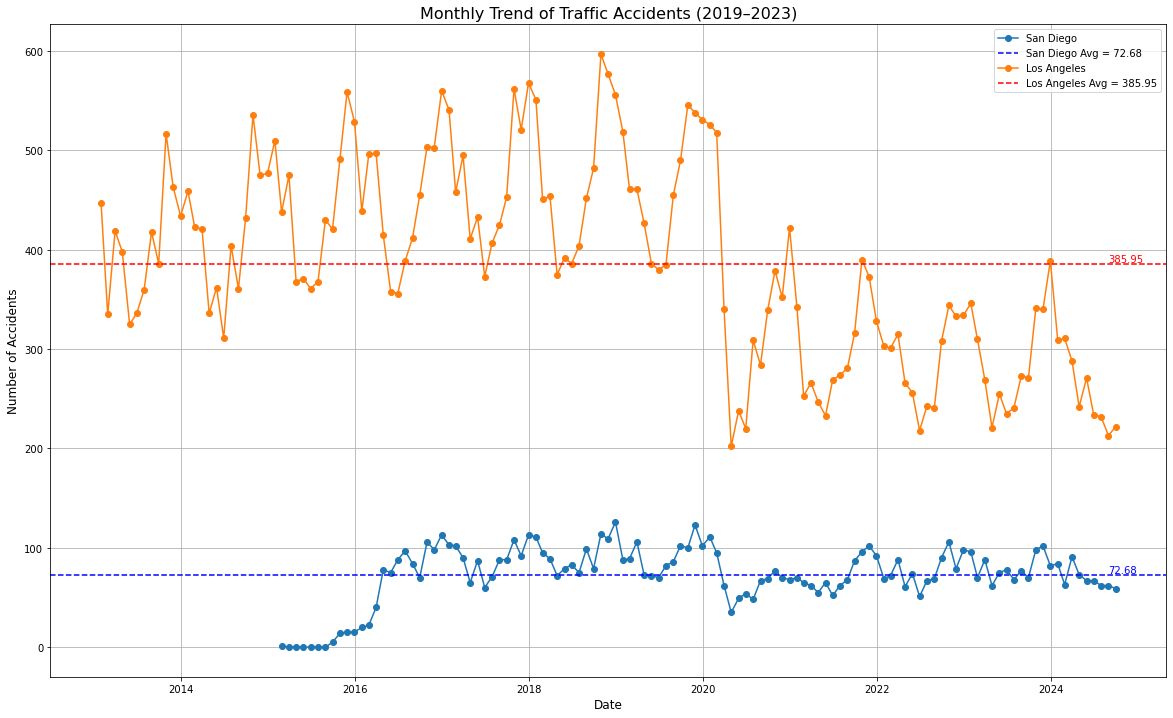

In [406]:
# Group data by month and count accidents
sd_monthly = sd_combined.resample('M', on='COLLISION_DATE').size()
la_monthly = la_combined.resample('M', on='COLLISION_DATE').size()

# Calculate average values
sd_monthly_avg = sd_monthly.mean()
la_monthly_avg = la_monthly.mean()

# Plot monthly trend with average lines
plt.figure(figsize=(20, 12))
plt.plot(sd_monthly, label='San Diego', marker='o')
plt.axhline(sd_monthly_avg, color='blue', linestyle='--', label=f'San Diego Avg = {sd_monthly_avg:.2f}')
plt.text(sd_monthly.index[-2], sd_monthly_avg + 2, f'{sd_monthly_avg:.2f}', color='blue')

plt.plot(la_monthly, label='Los Angeles', marker='o')
plt.axhline(la_monthly_avg, color='red', linestyle='--', label=f'Los Angeles Avg = {la_monthly_avg:.2f}')
plt.text(la_monthly.index[-2], la_monthly_avg + 2, f'{la_monthly_avg:.2f}', color='red')

plt.title('Monthly Trend of Traffic Accidents (2019–2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


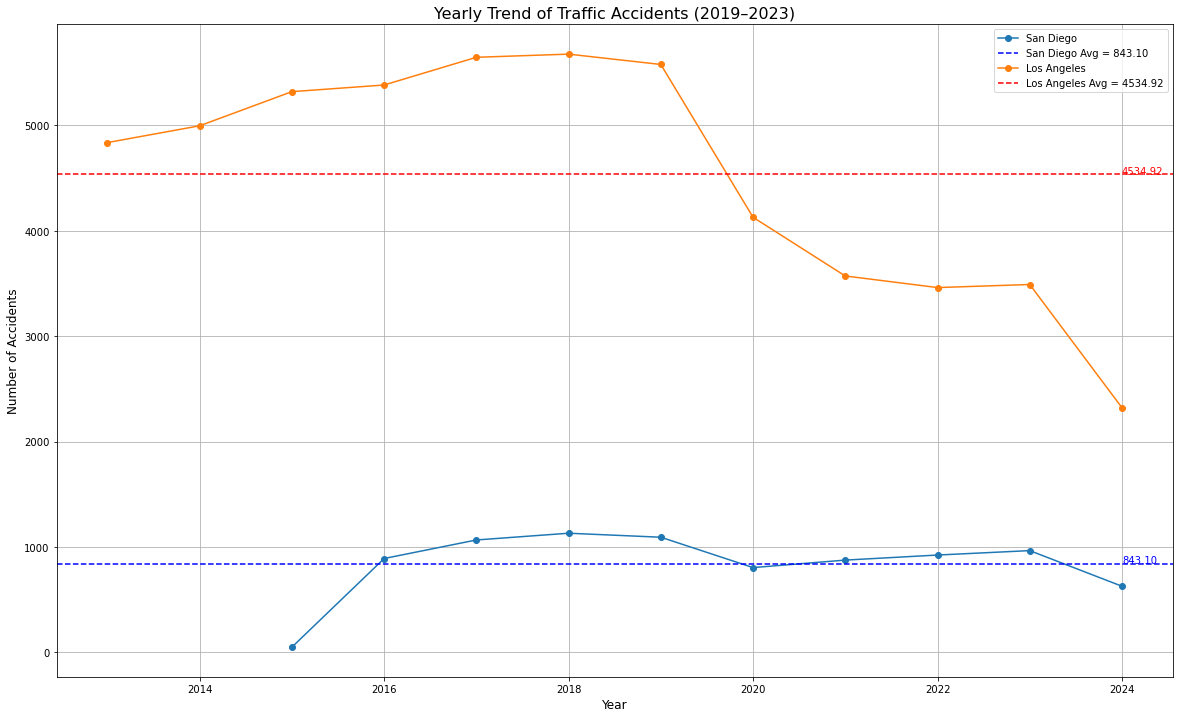

In [407]:
# Group by year
sd_yearly = sd_combined['year'].value_counts().sort_index()
la_yearly = la_combined['year'].value_counts().sort_index()

# Calculate average values
sd_yearly_avg = sd_yearly.mean()
la_yearly_avg = la_yearly.mean()

# Plot yearly trend with average lines
plt.figure(figsize=(20, 12))
sd_yearly.plot(label='San Diego', marker='o')
plt.axhline(sd_yearly_avg, color='blue', linestyle='--', label=f'San Diego Avg = {sd_yearly_avg:.2f}')
plt.text(sd_yearly.index[-1], sd_yearly_avg + 2, f'{sd_yearly_avg:.2f}', color='blue')

la_yearly.plot(label='Los Angeles', marker='o')
plt.axhline(la_yearly_avg, color='red', linestyle='--', label=f'Los Angeles Avg = {la_yearly_avg:.2f}')
plt.text(la_yearly.index[-1], la_yearly_avg + 2, f'{la_yearly_avg:.2f}', color='red')

plt.title('Yearly Trend of Traffic Accidents (2019–2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#### Weather Impact on Accidents

In [408]:
sd_filtered = sd_combined[
    (sd_combined['COLLISION_DATE'] >= pd.to_datetime('2019-01-01')) &
    (sd_combined['COLLISION_DATE'] <= pd.to_datetime('2023-12-31'))
]

la_filtered = la_combined[
    (la_combined['COLLISION_DATE'] >= pd.to_datetime('2019-01-01')) &
    (la_combined['COLLISION_DATE'] <= pd.to_datetime('2023-12-31'))
]

In [409]:
sd_weather_trend = sd_filtered.groupby(
    ['year', 'month', 'weather_group']
).size().unstack(fill_value=0)

la_weather_trend = la_filtered.groupby(
    ['year', 'month', 'weather_group']
).size().unstack(fill_value=0)


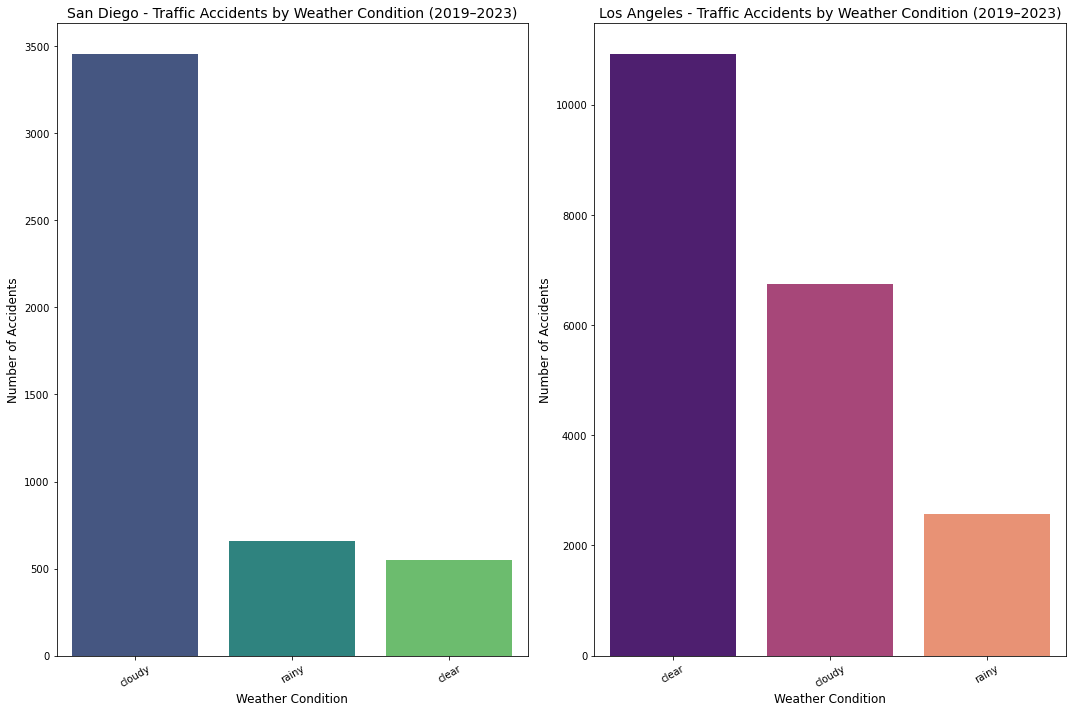

In [410]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(
    x='weather_group', 
    data=sd_filtered, 
    palette='viridis',  # Choose a colorful palette
    order=sd_filtered['weather_group'].value_counts().index
)
plt.title('San Diego - Traffic Accidents by Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30)

# ------------------------
# Histogram for Los Angeles
# ------------------------
plt.subplot(1, 2, 2)
sns.countplot(
    x='weather_group', 
    data=la_filtered, 
    palette='magma',  # Choose a different colorful palette for LA
    order=la_filtered['weather_group'].value_counts().index
)
plt.title('Los Angeles - Traffic Accidents by Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [411]:
sd_traffic.dtypes

CASE_ID                    int64
ACCIDENT_YEAR              int64
JURIS                      int64
COLLISION_DATE    datetime64[ns]
COLLISION_TIME             int64
                       ...      
LONGITUDE                float64
COUNTY                    object
CITY                      object
POINT_X                  float64
POINT_Y                  float64
Length: 77, dtype: object

#### Accidents by Time of Day 

In [412]:
# Clean collision time and convert to hour
# Step 1: Replace missing or invalid times with NaN
sd_filtered['COLLISION_TIME'] = pd.to_numeric(sd_filtered['COLLISION_TIME'], errors='coerce')
la_filtered['COLLISION_TIME'] = pd.to_numeric(la_filtered['COLLISION_TIME'], errors='coerce')

# Step 2: Convert to string and handle edge cases
sd_filtered['COLLISION_TIME'] = sd_filtered['COLLISION_TIME'].astype(str).str.zfill(4)
la_filtered['COLLISION_TIME'] = la_filtered['COLLISION_TIME'].astype(str).str.zfill(4)

# Step 3: Extract the hour using datetime conversion
sd_filtered['hour'] = pd.to_datetime(sd_filtered['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour
la_filtered['hour'] = pd.to_datetime(la_filtered['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour

# Step 4: Drop NaNs from hour column
sd_filtered = sd_filtered.dropna(subset=['hour'])
la_filtered = la_filtered.dropna(subset=['hour'])

# Step 5: Convert to integer
sd_filtered['hour'] = sd_filtered['hour'].astype(int)
la_filtered['hour'] = la_filtered['hour'].astype(int)


/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/388251911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_filtered['COLLISION_TIME'] = pd.to_numeric(sd_filtered['COLLISION_TIME'], errors='coerce')
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/388251911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_filtered['COLLISION_TIME'] = pd.to_numeric(la_filtered['COLLISION_TIME'], errors='coerce')
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/38825

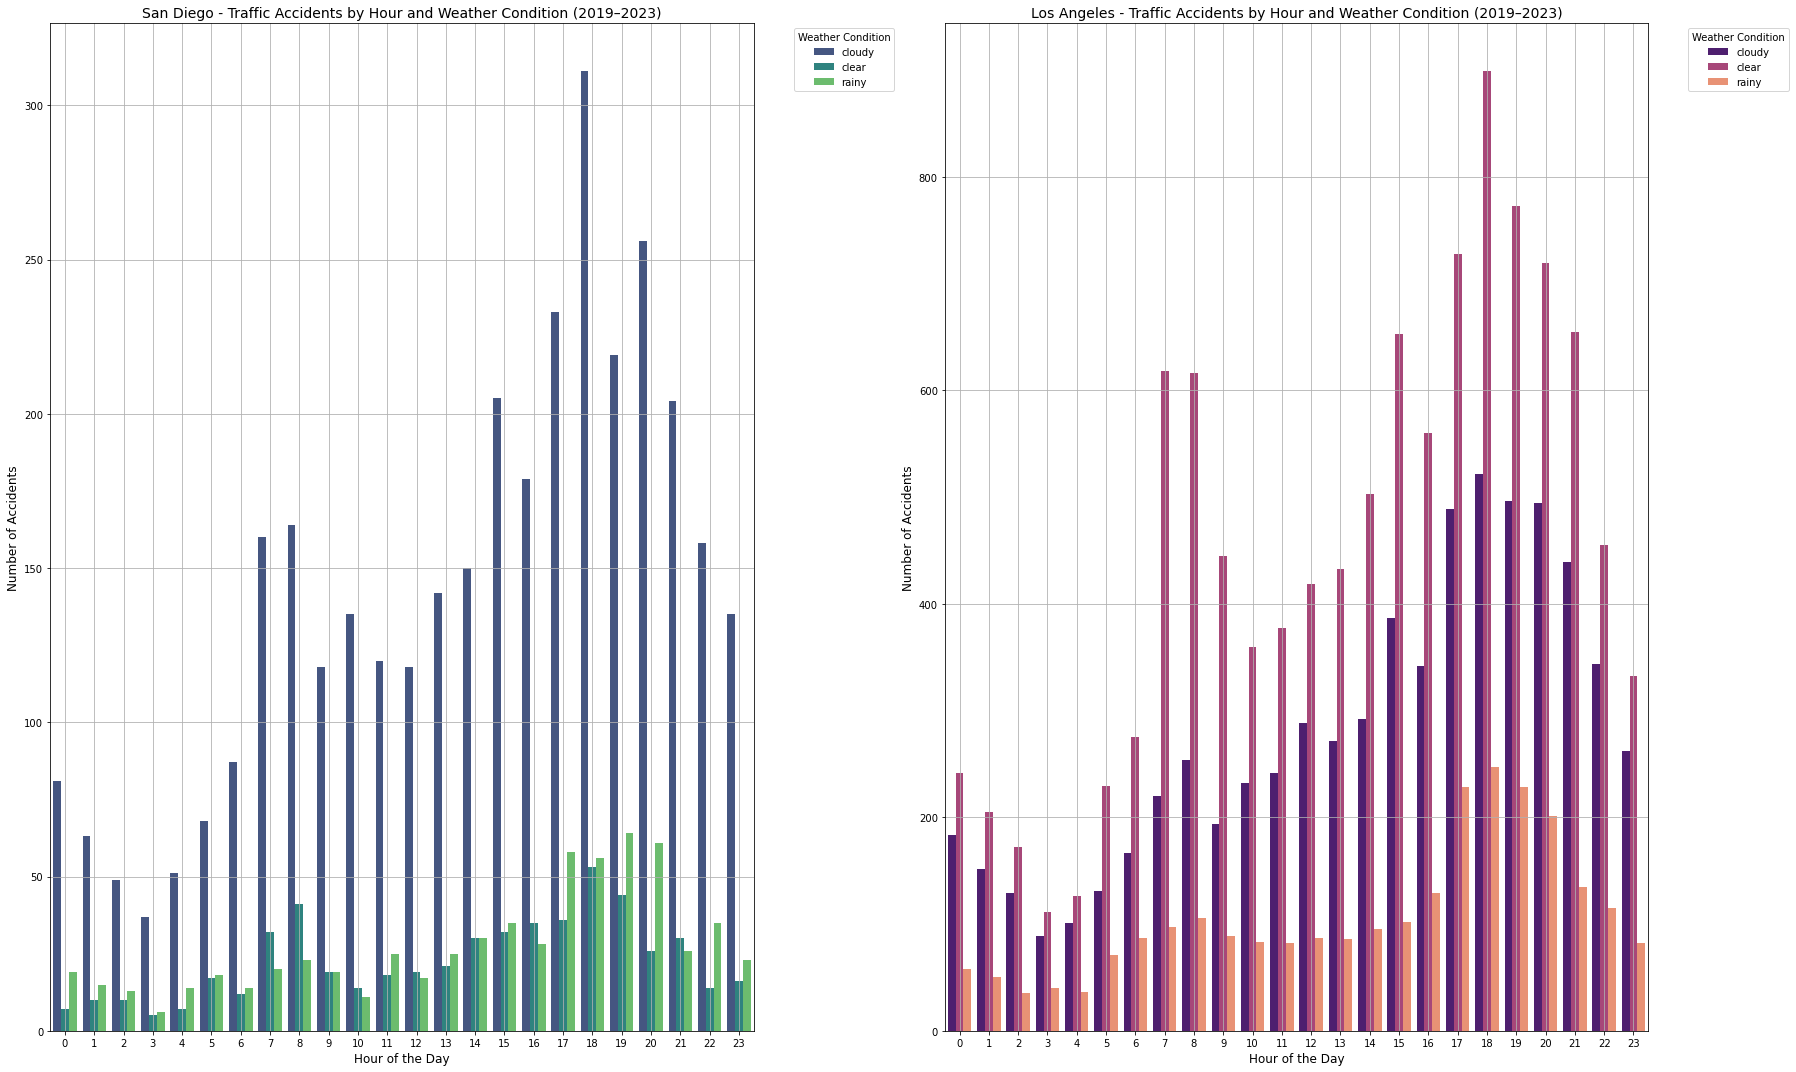

In [413]:
plt.figure(figsize=(25, 15))

plt.subplot(1, 2, 1)
sns.countplot(
    x='hour', 
    hue='weather_group', 
    data=sd_filtered,
    palette='viridis'
)
plt.title('San Diego - Traffic Accidents by Hour and Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.countplot(
    x='hour', 
    hue='weather_group', 
    data=la_filtered,
    palette='magma'
)
plt.title('Los Angeles - Traffic Accidents by Hour and Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Accidents by Day of the Week

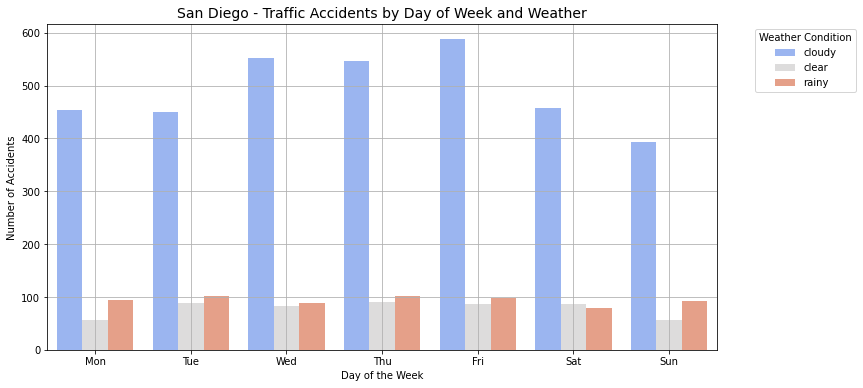

In [414]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=sd_filtered, palette='coolwarm')
plt.title('San Diego - Traffic Accidents by Day of Week and Weather', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

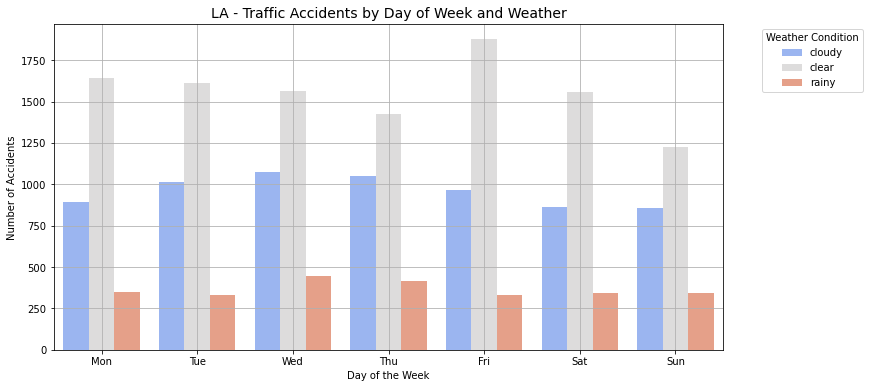

In [415]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=la_filtered, palette='coolwarm')
plt.title('LA - Traffic Accidents by Day of Week and Weather', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Traffic Accidents 3-Month Rolling Average

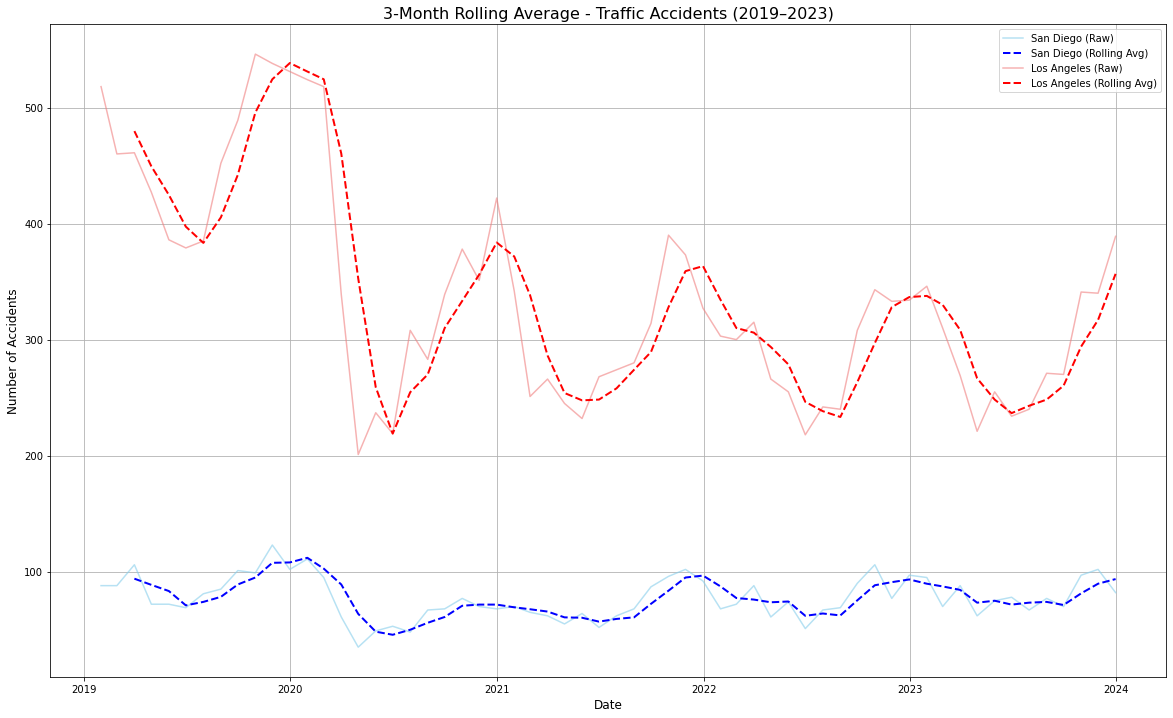

In [416]:
sd_monthly = sd_filtered.resample('M', on='COLLISION_DATE').size()
la_monthly = la_filtered.resample('M', on='COLLISION_DATE').size()

sd_monthly_rolling = sd_monthly.rolling(window=3).mean()
la_monthly_rolling = la_monthly.rolling(window=3).mean()

plt.figure(figsize=(20, 12))

plt.plot(sd_monthly, label='San Diego (Raw)', color='skyblue', alpha=0.6, linestyle='-')
plt.plot(sd_monthly_rolling, label='San Diego (Rolling Avg)', color='blue', linestyle='--', linewidth=2)

plt.plot(la_monthly, label='Los Angeles (Raw)', color='lightcoral', alpha=0.6, linestyle='-')
plt.plot(la_monthly_rolling, label='Los Angeles (Rolling Avg)', color='red', linestyle='--', linewidth=2)

plt.title('3-Month Rolling Average - Traffic Accidents (2019–2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### Hour vs. Weather Condition

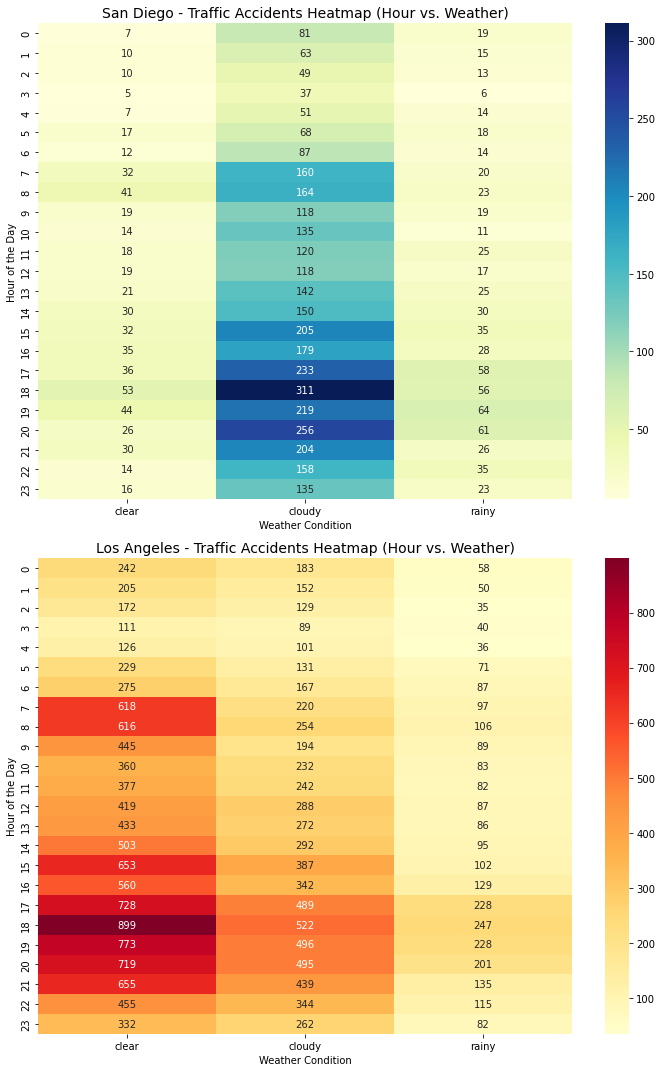

In [417]:
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

sd_pivot = sd_filtered.pivot_table(index='hour', columns='weather_group', values='CASE_ID', aggfunc='count', fill_value=0)
sns.heatmap(sd_pivot, cmap='YlGnBu', annot=True, fmt='d', ax=axs[0])
axs[0].set_title('San Diego - Traffic Accidents Heatmap (Hour vs. Weather)', fontsize=14)
axs[0].set_xlabel('Weather Condition')
axs[0].set_ylabel('Hour of the Day')

la_pivot = la_filtered.pivot_table(index='hour', columns='weather_group', values='CASE_ID', aggfunc='count', fill_value=0)
sns.heatmap(la_pivot, cmap='YlOrRd', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Los Angeles - Traffic Accidents Heatmap (Hour vs. Weather)', fontsize=14)
axs[1].set_xlabel('Weather Condition')
axs[1].set_ylabel('Hour of the Day')

plt.tight_layout()
plt.show()

#### Traffic Accidents by Day and Weather

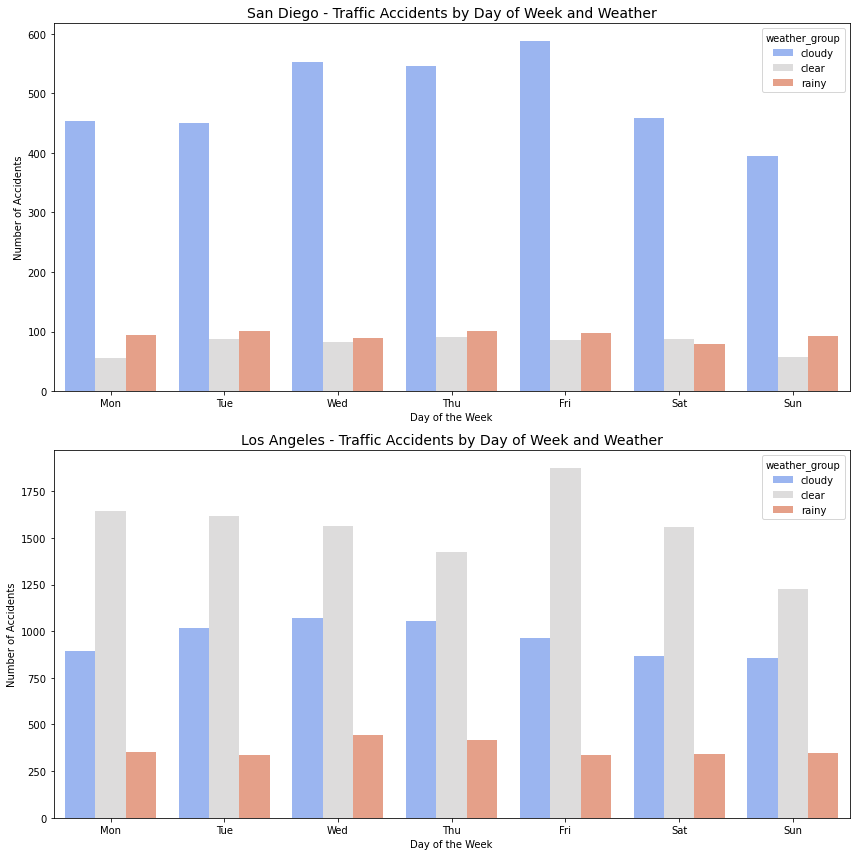

In [418]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=sd_filtered, palette='coolwarm', ax=axs[0])
axs[0].set_title('San Diego - Traffic Accidents by Day of Week and Weather', fontsize=14)
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Number of Accidents')
axs[0].set_xticks(range(7))
axs[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=la_filtered, palette='coolwarm', ax=axs[1])
axs[1].set_title('Los Angeles - Traffic Accidents by Day of Week and Weather', fontsize=14)
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Number of Accidents')
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


#### Severity of Accidents by Weather

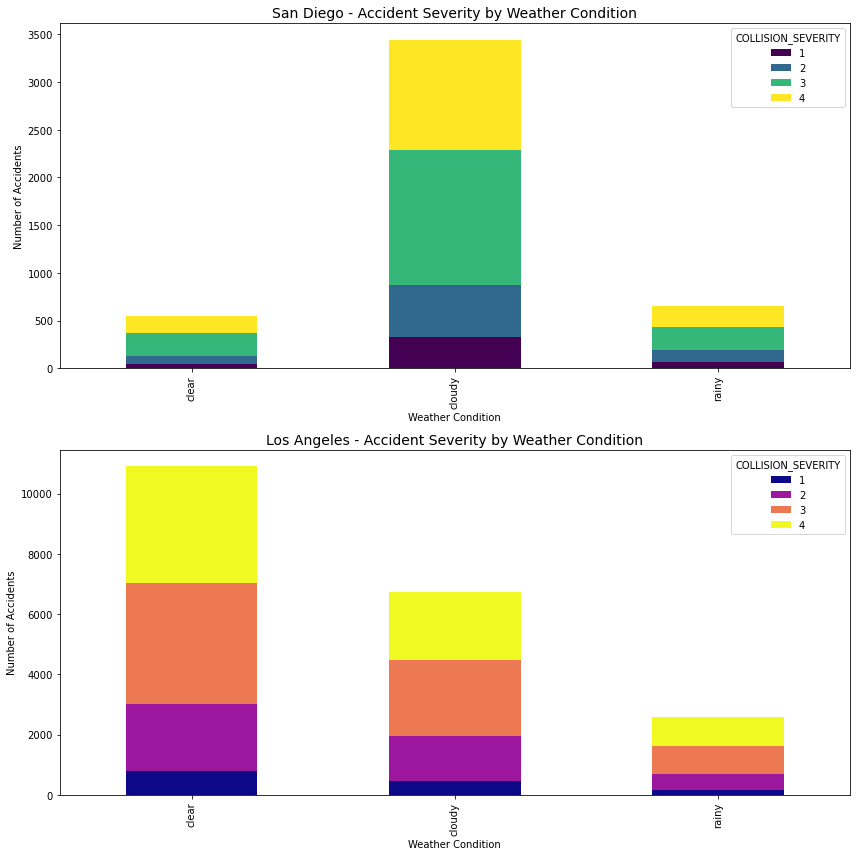

In [419]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

sd_severity_counts = sd_filtered.groupby(['weather_group', 'COLLISION_SEVERITY']).size().unstack(fill_value=0)
sd_severity_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=axs[0])
axs[0].set_title('San Diego - Accident Severity by Weather Condition', fontsize=14)
axs[0].set_xlabel('Weather Condition')
axs[0].set_ylabel('Number of Accidents')

la_severity_counts = la_filtered.groupby(['weather_group', 'COLLISION_SEVERITY']).size().unstack(fill_value=0)
la_severity_counts.plot(kind='bar', stacked=True, colormap='plasma', ax=axs[1])
axs[1].set_title('Los Angeles - Accident Severity by Weather Condition', fontsize=14)
axs[1].set_xlabel('Weather Condition')
axs[1].set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

#### Accidents Frequency by Road Type

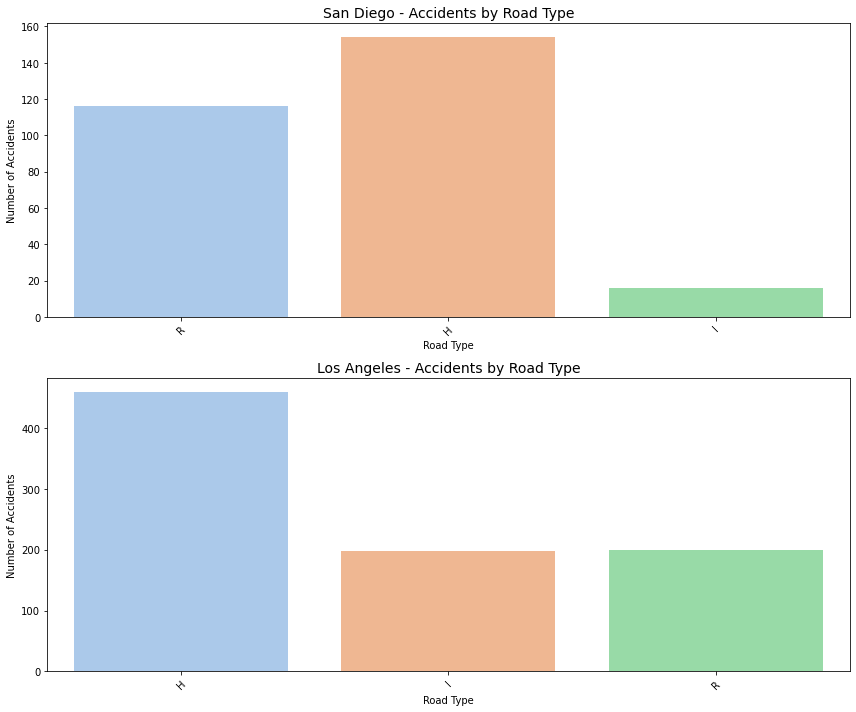

In [420]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

sns.countplot(x='LOCATION_TYPE', data=sd_filtered, palette='pastel', ax=axs[0])
axs[0].set_title('San Diego - Accidents by Road Type', fontsize=14)
axs[0].set_xlabel('Road Type')
axs[0].set_ylabel('Number of Accidents')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x='LOCATION_TYPE', data=la_filtered, palette='pastel', ax=axs[1])
axs[1].set_title('Los Angeles - Accidents by Road Type', fontsize=14)
axs[1].set_xlabel('Road Type')
axs[1].set_ylabel('Number of Accidents')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### Seasonal Impact on Accidents

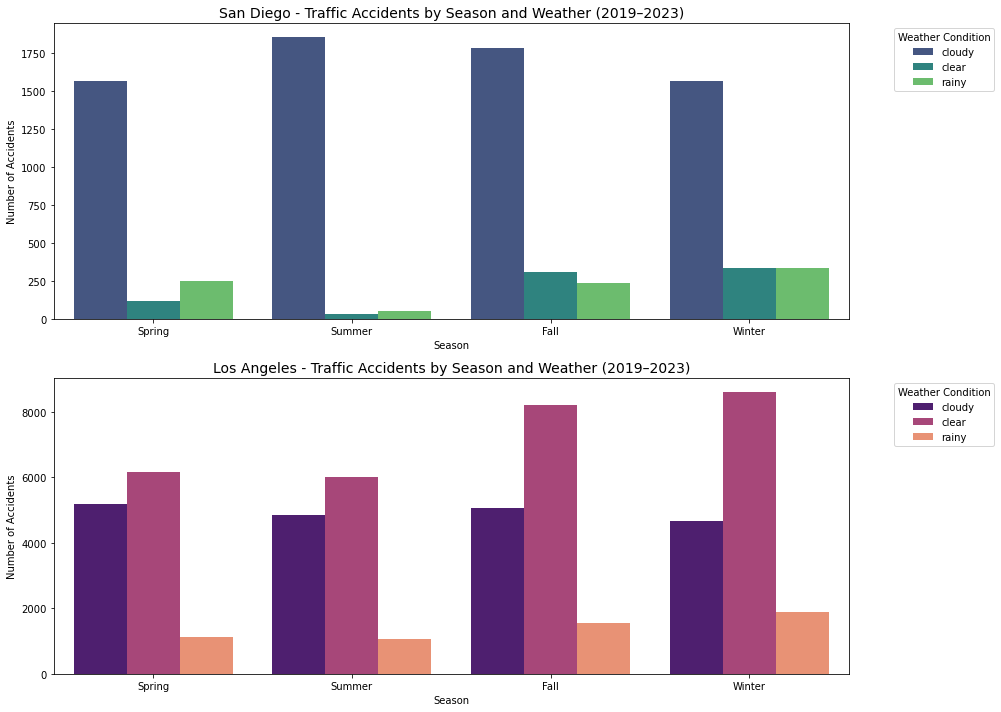

In [421]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# San Diego
sns.countplot(
    x='season', 
    hue='weather_group', 
    data=sd_combined, 
    palette='viridis',
    order=season_order,
    ax=axs[0]
)
axs[0].set_title('San Diego - Traffic Accidents by Season and Weather (2019–2023)', fontsize=14)
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Number of Accidents')
axs[0].legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Los Angeles
sns.countplot(
    x='season', 
    hue='weather_group', 
    data=la_combined, 
    palette='magma',
    order=season_order,
    ax=axs[1]
)
axs[1].set_title('Los Angeles - Traffic Accidents by Season and Weather (2019–2023)', fontsize=14)
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Number of Accidents')
axs[1].legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### Correlation Matrix

In [422]:
sd_combined = pd.merge(
    sd_combined,
    sd_weather[['datetime', 'temp', 'humidity', 'windspeed', 'cloudcover']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

la_combined = pd.merge(
    la_combined,
    la_weather[['datetime', 'temp', 'humidity', 'windspeed', 'cloudcover']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)
weather_cols = ['temp', 'humidity', 'windspeed', 'cloudcover']
for col in weather_cols:
    if col in sd_combined.columns:
        sd_combined[col].fillna(sd_combined[col].mean(), inplace=True)
    if col in la_combined.columns:
        la_combined[col].fillna(la_combined[col].mean(), inplace=True)

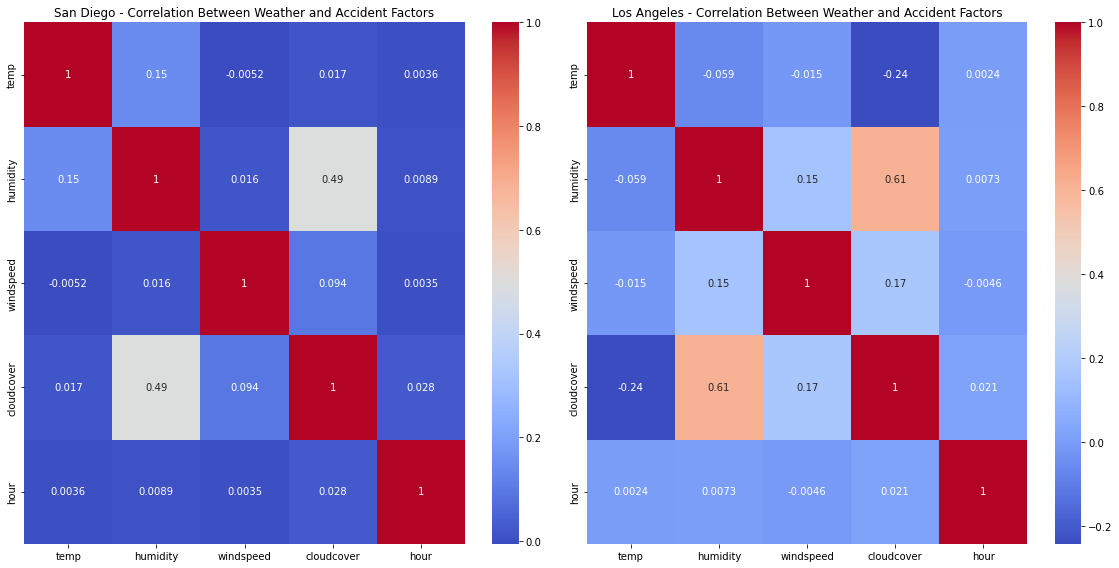

In [423]:
# Ensure COLLISION_TIME is in a consistent format and extract hour
sd_combined['COLLISION_TIME'] = pd.to_numeric(sd_combined['COLLISION_TIME'], errors='coerce')
la_combined['COLLISION_TIME'] = pd.to_numeric(la_combined['COLLISION_TIME'], errors='coerce')

# Format the COLLISION_TIME as HHMM and extract hour
sd_combined['COLLISION_TIME'] = sd_combined['COLLISION_TIME'].astype(str).str.zfill(4)
la_combined['COLLISION_TIME'] = la_combined['COLLISION_TIME'].astype(str).str.zfill(4)

# Extract hour from formatted COLLISION_TIME
sd_combined['hour'] = pd.to_datetime(sd_combined['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour
la_combined['hour'] = pd.to_datetime(la_combined['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour

# Drop rows where hour extraction failed (if necessary)
sd_combined.dropna(subset=['hour'], inplace=True)
la_combined.dropna(subset=['hour'], inplace=True)


fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# San Diego
sd_corr = sd_combined[['temp', 'humidity', 'windspeed', 'cloudcover', 'hour']].corr()
sns.heatmap(sd_corr, cmap='coolwarm', annot=True, ax=axs[0])
axs[0].set_title('San Diego - Correlation Between Weather and Accident Factors')

# Los Angeles
la_corr = la_combined[['temp', 'humidity', 'windspeed', 'cloudcover', 'hour']].corr()
sns.heatmap(la_corr, cmap='coolwarm', annot=True, ax=axs[1])
axs[1].set_title('Los Angeles - Correlation Between Weather and Accident Factors')

plt.tight_layout()
plt.show()


### 1. **Accident Frequency Over Time**  
- The line plots show that traffic accidents in **Los Angeles** are consistently higher than in **San Diego** over the analyzed period (2019–2023).  
- The average number of accidents in Los Angeles (~385.95) is significantly higher than in San Diego (~72.68), highlighting a more concerning traffic safety issue in Los Angeles.  
- Both cities exhibit seasonal patterns, with noticeable peaks and drops at certain times of the year.  

---

### 2. **Annual Trend of Accidents**  
- Los Angeles shows a consistent rise in traffic accidents from 2019 to 2021, followed by a decline after 2021.  
- San Diego's accident counts remained relatively stable over the years, with minor fluctuations.  
- The average yearly accident count in Los Angeles (~4534.92) far exceeds that in San Diego (~843.10), reinforcing the traffic safety gap.  

---

### 3. **Weather Impact on Accidents**  
- The bar plots by weather type reveal that **cloudy weather** contributes to the highest number of accidents in both cities.  
- Clear weather also accounts for a significant portion of accidents, while rainy conditions have the lowest accident rate.  
- This suggests that poor weather conditions (like rain) may deter driving, while moderate weather conditions may lead to increased traffic volume and hence more accidents.  

---

### 4. **Accidents by Season and Weather Conditions**  
- In San Diego, the highest number of accidents occurs during **Winter** and **Fall**, with cloudy weather being the dominant condition.  
- In Los Angeles, accidents are more evenly distributed across seasons, but cloudy weather still contributes the most accidents.  
- This pattern suggests that seasonality and weather conditions play a role in influencing driver behavior and accident risk.  

---

### 5. **Correlation Between Weather and Accident Factors**  
- In San Diego, the correlation matrix shows that **temperature** and **humidity** have weak to moderate correlations with accident timing and frequency.  
- In Los Angeles, **windspeed** shows a slightly higher correlation with accident frequency compared to other weather factors.  
- Interestingly, **cloud cover** in Los Angeles has a positive correlation (~0.61) with accident counts, suggesting that reduced visibility or overcast conditions may increase accident likelihood.  
- The relatively low correlation coefficients imply that while weather has an influence, other factors (like road conditions, traffic volume, and driver behavior) might have a stronger impact.  

---

### 6. **Collision Severity Distribution**  
- The severity of collisions is generally low (level 1–2) in both cities.  
- However, Los Angeles shows more level 3 and level 4 severity cases, indicating a greater risk of serious accidents.  
- This may reflect differences in road infrastructure, traffic density, or driving behavior between the two cities.  

---

### 7. **Time-of-Day Impact**  
- Accidents are more frequent during **rush hours** (morning and evening), aligning with peak traffic volumes.  
- This suggests that increased congestion and driver stress during these periods may elevate accident risk.  

---

### 🌟 **Key Takeaways**
✅ Los Angeles faces a more severe traffic accident issue compared to San Diego, both in terms of frequency and severity.  
✅ Weather conditions, particularly **cloud cover** and **humidity**, show moderate correlations with accident patterns.  
✅ Accident severity tends to be higher in Los Angeles, possibly due to more complex road networks and higher traffic volumes.  
✅ Targeting **rush hour periods** and **cloudy weather conditions** through better traffic control measures could help reduce accident rates.  
✅ Seasonal changes in accident frequency highlight the need for flexible traffic management strategies depending on the time of year.  

---